In [98]:
import glob
import pandas as pd
import numpy as np
import os

In [99]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import re 

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
import joblib

In [100]:
all_file= glob.glob("../songData/*.xlsx")
len(all_file)
all_file

['../songData/songType5.xlsx',
 '../songData/songType11.xlsx',
 '../songData/songType12.xlsx',
 '../songData/songType14.xlsx',
 '../songData/songType18.xlsx',
 '../songData/songType15.xlsx',
 '../songData/songType9.xlsx',
 '../songData/songType2.xlsx',
 '../songData/songType13.xlsx',
 '../songData/songType16.xlsx',
 '../songData/songType8.xlsx',
 '../songData/songType6.xlsx',
 '../songData/songType19.xlsx',
 '../songData/songType7.xlsx',
 '../songData/songType1.xlsx',
 '../songData/songType4.xlsx',
 '../songData/songType0.xlsx',
 '../songData/songType17.xlsx',
 '../songData/songType20.xlsx',
 '../songData/songType3.xlsx',
 '../songData/songType10.xlsx']

In [101]:
names = []
count = []
clusters = []
data = []

for each in all_file:
    temp = pd.read_excel(each)
    count.append(len(temp))
    names.append(each.split('/')[2][:-5])
    clusters.append(temp['songType'].iloc[0])
    data.append(temp)
names
data = pd.concat(data)

In [102]:

data = data.sample(frac = 1)
pd.DataFrame(data)
data['lyrics'].iloc[1]

'এই বালুকা বেলায় আমি লিখেছিনু একটি সে নাম আমি লিখেছিনু আজ সাগরের ঢেউ দিয়ে তারে যেন মুছিয়া দিলাম।। কেন তবু বারে বার ভুলে যাই আজ মোর কিছু নাই ভুলের বালুচরে যে বাসর বাঁধা হল জানি তার নেই কোন দাম। আজ সাগরের ঢেউ দিয়ে সবকিছু মুছিয়া দিলাম।। এই সাগরেরই কতো রূপ দেখেছি কখনো শান্ত রূপে কখনো অশান্ত সে আমি শুধু চেয়ে চেয়ে থেকেছি। মনে হয় এ তো নয় বালুচর আশা তাই বাঁধে ঘর দাঁড়ায়ে একলা শুধু ঢেউ আর ঢেউ গুনি এ গোনার নেই যে বিরাম। আজ সবকিছু দিয়ে আমি জানিনা তো কি যে নিলাম।।'

In [103]:
stop_words = [ 'হাই', 'ফ্রিকুয়েন্সি', 'কিন্তু', 'অপ্রয়োজনীয়', 'শব্দ' ]

In [104]:
data['lyrics']= data['lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [105]:
X_train, X_test, y_train, y_test =  train_test_split(data['lyrics'], data['songType'], test_size=0.33, random_state=42 )

In [106]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics

total_data_count = len(data)
per_class_counts = []
unique_classes = np.unique(data['songType'].values)
class_count_mean = np.mean(count)

###########################3
############### classifier setup ################
from sklearn.ensemble import RandomForestClassifier
text_clf_svm = Pipeline([
    
    ('vect', CountVectorizer(#stop_words = stop_words,
                            analyzer="word", 
                            lowercase=False,
                            token_pattern="[\S]*",
                            tokenizer=None,
                            ngram_range=(1,3),
                            preprocessor=None)),                 
    ('tfidf', TfidfTransformer()),
    ('clf-svm',RandomForestClassifier(
                 n_estimators=100,
                 criterion="gini",
                 max_depth=None,
                 min_samples_split=2,
                 min_samples_leaf=1,
                 min_weight_fraction_leaf=0.,
                 max_features="auto",
                 max_leaf_nodes=None,
                 min_impurity_decrease=0.,
                 min_impurity_split=None,
                 bootstrap=False,
                 oob_score=False,
                 n_jobs=None,
                 random_state=None,
                 verbose=0,
                 warm_start=False,
                 ccp_alpha=0.0,
                 max_samples=None)),
                                                                        
])
classifier = text_clf_svm.fit(list(X_train), list(y_train))


cv = ShuffleSplit(n_splits=6, test_size=0.3, random_state=0)
score = cross_val_score(text_clf_svm, list(X_train), list(y_train), cv=cv)

print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
5

predicted = classifier.predict(X_test)

Cross Accuracy: 0.48 (+/- 0.02)


In [107]:
joblib.dump(classifier, '../Model/sample_model.pickle')

['../Model/sample_model.pickle']

In [108]:
print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print(metrics.classification_report(y_test, predicted))

Cross Accuracy: 0.48 (+/- 0.02)
              precision    recall  f1-score   support

           1       0.38      0.85      0.52       342
           2       0.00      0.00      0.00         3
           3       0.58      0.29      0.39       256
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        20
           6       0.40      0.08      0.14        24
           7       1.00      0.06      0.11        68
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00        14
          10       0.00      0.00      0.00        17
          11       0.00      0.00      0.00        15
          12       0.00      0.00      0.00        55
          13       0.53      0.29      0.38       223
          14       1.00      0.11      0.19        19
          16       0.00      0.00      0.00         1
          17       0.74      0.87      0.80       270
          18       0.00      0.00      0.00      

/home/tuktuki/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
import pandas as pd
confusion_matrix = list(metrics.confusion_matrix(y_test, predicted))

<AxesSubplot:>

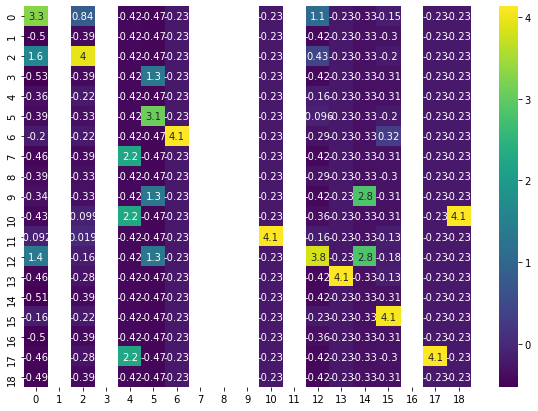

In [110]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix
df_cm = pd.DataFrame(array)
df_norm_col=(df_cm-df_cm.mean())/df_cm.std()
#df_norm_col=df_cm-df_cm.mean()
plt.figure(figsize = (10,7))
sn.heatmap(df_norm_col, annot=True,cmap='viridis')